# Devoir 2 - MCMC et Nested Sampling
## Installation

Installez les librairies suivantes:

- numpy
- matplotlib
- pandas
- scipy (optionnel, mais utile pour le nested sampling)
- emcee (doc: https://emcee.readthedocs.io/en/stable/)
- corner (doc: https://corner.readthedocs.io/en/latest/)
- dynesty (doc: https://dynesty.readthedocs.io/en/stable/index.html)
- tqdm
- batman-package (doc: https://lkreidberg.github.io/batman/docs/html/index.html)
  - batman contient un peu de code en C, qui doit être compilé à l'installation. Sur Linux et Mac tout devrait fonctionner normalement.
  - Pour installer sur Windows: https://github.com/lkreidberg/batman/issues/26

## Exploration des données

In [1]:
import matplotlib.pyplot as plt
from pandas import read_csv
import numpy as np
from matplotlib import rcParams

plt.style.use("tableau-colorblind10")
rcParams["font.size"] = 14

In [2]:
data = read_csv("./data.csv")
t = data["time"].values
flux = data["flux"].values
eflux = np.ones_like(flux) * 1e-4

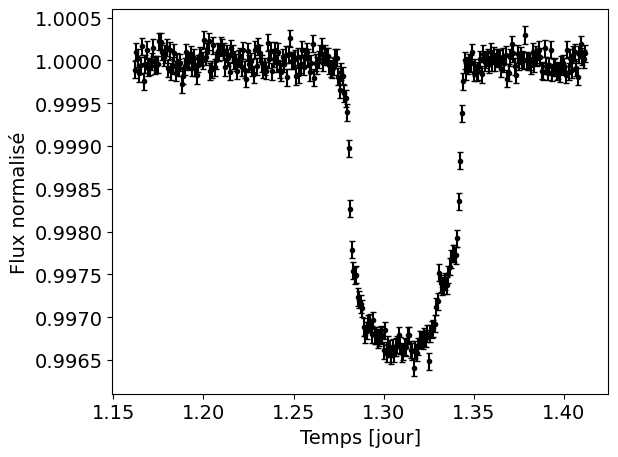

In [3]:
fig, ax = plt.subplots()
ax.errorbar(t, flux, yerr=eflux, fmt="k.", capsize=2)
ax.set_xlabel("Temps [jour]")
ax.set_ylabel("Flux normalisé")
plt.tight_layout()
plt.show()

## Définition d'un modèle avec batman
Il faut maintenant définir un modèle qui décrit une courbe de transit.
On utilise batman pour faire les calculs liés à ce modèle.

In [4]:
import batman

L'objet `TransitParams` de `batman` permet d'emmagasiner les paramètres de notre modèle de transit.
Batman utilise l'inclinaison, par défaut. Dans notre cas, nous utilisons le paramètre d'impact. Il faut donc convertir entre les deux.

In [5]:
params = batman.TransitParams()
params.t0 = 1.25  # Valeur dans l'interval de l'énoncé, pour un premier test
params.per = 3
params.rp = 0.05  # Valeur dans l'interval de l'énoncé, pour un premier test
params.a = 15  # demi-grand axe, en unités de Rstar
params.inc = 90.0
params.ecc = 0.0  # Orbite circulaire
params.w = 90.0  # Orbite circulaire [w en degrés]
params.limb_dark = "quadratic"
params.u = [0.3, 0.3]  # Coefficients pour le "limb darkening"

In [6]:
tmodel = batman.TransitModel(params, t)

In [7]:
flux_model = tmodel.light_curve(params)

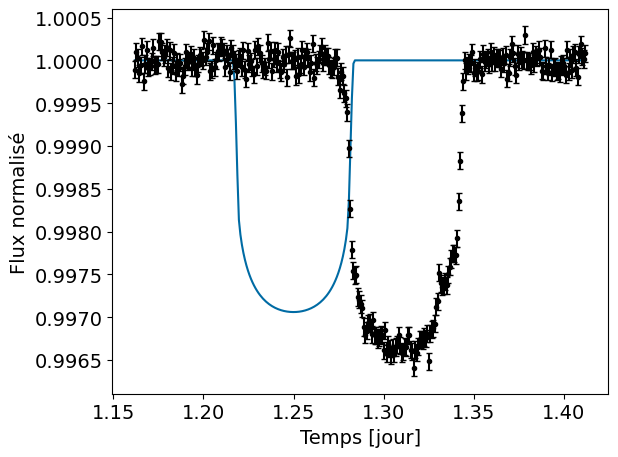

In [8]:
fig, ax = plt.subplots()
ax.plot(t, flux_model)
ax.errorbar(t, flux, yerr=eflux, fmt="k.", capsize=2)
ax.set_xlabel("Temps [jour]")
ax.set_ylabel("Flux normalisé")
plt.tight_layout()
plt.show()

Clairement, ces valeurs ne sont pas optimales On peut essayer d'améliorer un peu la situation à l'oeil, en modifiant le rayon et le temps de mi-transit.

In [9]:
params.t0 = 1.31  # Valeur dans l'interval de l'énoncé, pour un premier test
params.rp = 0.055  # Valeur dans l'interval de l'énoncé, pour un premier test

In [10]:
tmodel = batman.TransitModel(params, t)

In [11]:
flux_model = tmodel.light_curve(params)

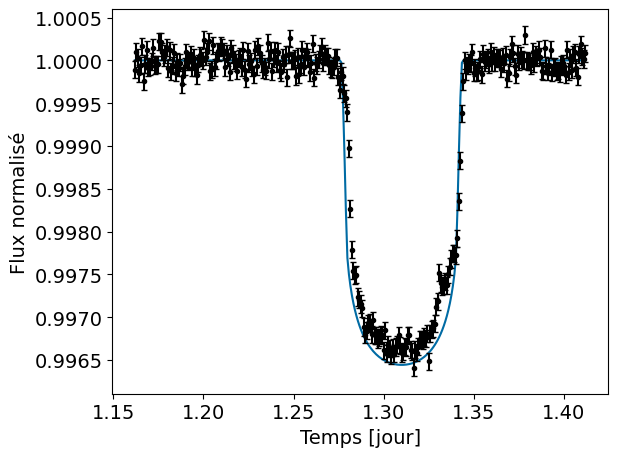

In [12]:
fig, ax = plt.subplots()
ax.plot(t, flux_model)
ax.errorbar(t, flux, yerr=eflux, fmt="k.", capsize=2)
ax.set_xlabel("Temps [jour]")
ax.set_ylabel("Flux normalisé")
plt.tight_layout()
plt.show()

Dans le devoir 2, vous aurez à utiliser les `TransitParam` et `TransitModel` dans votre modèle physique. A vous de voir si vous en créez un nouveau chaque fois que la fonction est appelée ou si vous utilisez des arguments additionnels dans votre fonction `model()` pour donner un objet `transitparam` et un objet `transitmodel` en argument. Chose certaine, les trois paramètres estimés dans votre modèle (`rp`, `t0` et `b`) doivent être mis à jour chaque fois que `model()` est appelée. Pour `b`, on met à jour la valeur de `inc` dans le modèle batman.

In [13]:
def model(params, t, batparams):
    rp = params[0]
    t0 = params[1]
    b = params[2]

    batparams.rp = rp
    batparams.t0 = t0
    batparams.inc = 90.0  # TODO: convertir b -> i au lieu d'utiliser une valeur fixe

    tmodel = batman.TransitModel(batparams, t)
    return tmodel.light_curve(batparams)

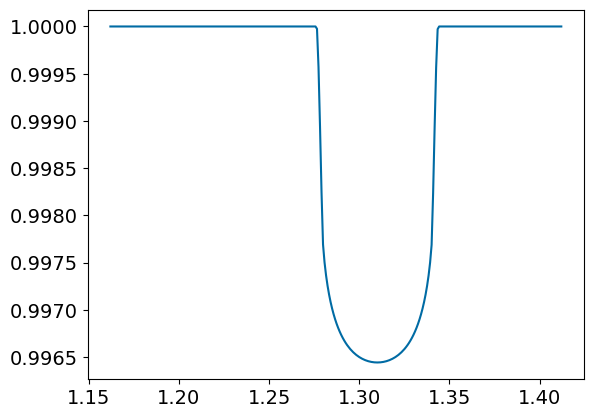

In [14]:
theta = [0.055, 1.31, 0.1]
plt.plot(t, model(theta, t, params))
plt.show()